In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sqlite3   # for read raw data


In [ ]:
### First insights of data and cleansing

In [5]:
con=sqlite3.connect(r'C:\Users\tugba\Desktop\DataScience\zomato_rawdata.sqlite')

In [7]:
df=pd.read_sql_query("SELECT * FROM USERS", con)

In [8]:
df.shape

(51717, 18)

In [10]:
df.isnull().sum()


index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [11]:
df.dtypes


index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [12]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')

In [15]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', None, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [17]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [18]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [19]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713      None
51714      None
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51717, dtype: object

In [21]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
df['rate']=df['rate'].str.replace('/5','')

In [24]:
df['rate']=df['rate'].astype(str)

In [25]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'None', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [28]:
df['rate'].replace('NEW', np.nan, inplace=True)
df['rate'].replace('None', np.nan, inplace=True)
df['rate'].replace('-', np.nan, inplace=True)

C:\Users\tugba\AppData\Local\Temp\ipykernel_19940\252746159.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace('NEW', np.nan, inplace=True)
C:\Users\tugba\AppData\Local\Temp\ipykernel_19940\252746159.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [30]:
df['rate'].isnull().sum()

10052

In [31]:
### Data cleansing completed

In [32]:
### Part 2 WordCloud Analysis

In [33]:
df['rate']=df['rate'].astype(float)

In [34]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [36]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [38]:
## quick bites has most entries so we will work on quick bites
df['rest_type'].isnull().sum()  # missing values are very few compared to other columns

227

In [39]:
data=df.dropna(subset=['rest_type'])

In [40]:
data.shape

(51490, 18)

In [41]:
data['rest_type'].str.contains('Quick Bites')

0        False
1        False
2        False
3         True
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51490, dtype: bool

In [43]:
data_qb=data[data['rest_type'].str.contains('Quick Bites')]

In [44]:
data_qb.shape

(20639, 18)

In [45]:
data_qb['dish_liked']

3                                              Masala Dosa
23                                         Pasta, Iced Tea
26                                                    None
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              Burgers
Name: dish_liked, Length: 20639, dtype: object

In [46]:
data_qb['dish_liked'].str.lower()

3                                              masala dosa
23                                         pasta, iced tea
26                                                    None
31       burgers, lassi, chicken grill, naan, momos, ch...
34       rolls, veggie wrap, chocolate fantasy, rice bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              burgers
Name: dish_liked, Length: 20639, dtype: object

In [52]:
all_dishes=data_qb['dish_liked'].str.lower().str.cat()

In [48]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 245.8 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/301.4 kB 328.2 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.4 kB 514.3 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/301.4 kB 808.4 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 933.2 kB/s eta 0:00:00


In [49]:
import wordcloud 

In [50]:
from wordcloud import WordCloud

In [54]:
wordcloud = WordCloud().generate(all_dishes)

(-0.5, 399.5, 199.5, -0.5)

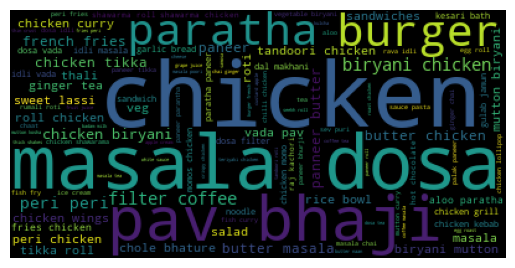

In [57]:
plt.imshow(wordcloud)
plt.axis('off')

In [59]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [60]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [61]:
df[['rate','reviews_list']]

,rate,reviews_list
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...
51712,3.6,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,NaN,[]
51714,NaN,[]
51715,4.3,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


In [62]:
df['rate'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713     True
51714     True
51715    False
51716    False
Name: rate, Length: 51717, dtype: bool

In [63]:
df[df['rate'].isnull()]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NaN,0,+91 8050884222,Banashankari,Quick Bites,None,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
84,84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield
51675,51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield
51710,51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield


In [64]:
df[df['rate'].isnull()].index

Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,   114,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10052)

In [65]:
df['rate'][72]

nan

In [68]:
df['reviews_list'][72]

"[('Rated 4.0', 'RATED\\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'), ('Rated 5.0', 'RATED\\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]"

In [69]:
type(df['reviews_list'][72])

str

In [70]:
import ast

In [71]:
ast.literal_eval(df['reviews_list'][72])

[('Rated 4.0',
  'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'),
 ('Rated 5.0',
  'RATED\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]

In [75]:
first_input=ast.literal_eval(df['reviews_list'][72])[0]

In [76]:
first_input

('Rated 4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served')

In [78]:
[i.replace('Rated','').strip() for i in first_input]

['4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served']

In [79]:
[i.replace('Rated','').strip() for i in first_input][0]

'4.0'

In [80]:
type([i.replace('Rated','').strip() for i in first_input][0])

str

In [81]:
float([i.replace('Rated','').strip() for i in first_input][0])

4.0

In [88]:
def get_Rate(x):
    list_of_reviews = ast.literal_eval(x)

    if list_of_reviews is None or len(list_of_reviews) <=1:
        return None
    else:
        first_input =  list_of_reviews[0]
        rate = float([i.replace('Rated','').strip() for i in first_input][0])
        return rate
        
    

In [91]:
df['rate_from_reviews_list'] = df['reviews_list'].apply(get_Rate)

In [89]:
get_Rate(df['reviews_list'][72])

4.0

In [92]:
df['rate_from_reviews_list']

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: rate_from_reviews_list, Length: 51717, dtype: float64

In [93]:
df['rate_from_reviews_list'][72]

4.0

In [96]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [97]:
df['rate'][72] = df['rate_from_reviews_list'][72]

In [98]:
df[df['rate'].isnull()]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate_from_reviews_list
75,75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari,NaN
84,84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari,NaN
90,90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari,1.0
91,91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari,NaN
92,92,https://www.zomato.com/bangalore/annapooranesh...,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,NaN,0,+91 9742009518,Banashankari,Mess,None,South Indian,200.0,[],[],Delivery,Banashankari,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield,NaN
51675,51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield,NaN
51710,51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield,NaN
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield,NaN


In [99]:
nan_index = df[df['rate'].isnull()].index

In [101]:
for index in nan_index:
    df['rate'][index] = df['rate_from_reviews_list'][index]

In [103]:
df['rate'].isnull().sum()  # we fixed the rate columns' missing value

8542

In [105]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rate_from_reviews_list'],
      dtype='object')

In [106]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            8542
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rate_from_reviews_list         16120
dtype: int64

In [107]:
dataframe = df.drop(['dish_liked','rate_from_reviews_list'], axis=1)

In [108]:
dataframe

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,Finger Food,600.0,[],[],Pubs and bars,Whitefield
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,None,Whitefield,Bar,Finger Food,2000.0,[],[],Pubs and bars,Whitefield
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [109]:
dataframe.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [110]:
#### We replaced missing values and dropped columns which has missing values but no effect to prediction

In [111]:
### Let's do some feature extracting 

In [114]:
dataframe['cuisines'][0]

'North Indian, Mughlai, Chinese'

In [115]:
dataframe['cuisines'][0].split(',')

['North Indian', ' Mughlai', ' Chinese']

In [116]:
len(dataframe['cuisines'][0].split(','))

3

In [117]:
def count(row):
    return len(row.split(','))

In [118]:
dataframe['cuisines'].astype(str).apply(count)

0        3
1        3
2        3
3        2
4        2
        ..
51712    1
51713    1
51714    1
51715    1
51716    3
Name: cuisines, Length: 51717, dtype: int64

In [120]:
dataframe['total_cuisines'] = dataframe['cuisines'].astype(str).apply(count)
dataframe['multiple_types'] = dataframe['rest_type'].astype(str).apply(count)

In [122]:
dataframe.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1


In [123]:
threshold = 3.80
dataframe['target'] = dataframe['rate'].apply( lambda x : 1 if x > threshold else 0)

In [124]:
dataframe.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types,target
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1


In [128]:
dataframe[dataframe['target']==0]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types,target
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,0
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1,0
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2,1,0
5,5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari,1,1,0
6,6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51711,51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,4,2,0
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,1,1,0
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,Finger Food,600.0,[],[],Pubs and bars,Whitefield,1,1,0
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,None,Whitefield,Bar,Finger Food,2000.0,[],[],Pubs and bars,Whitefield,1,1,0


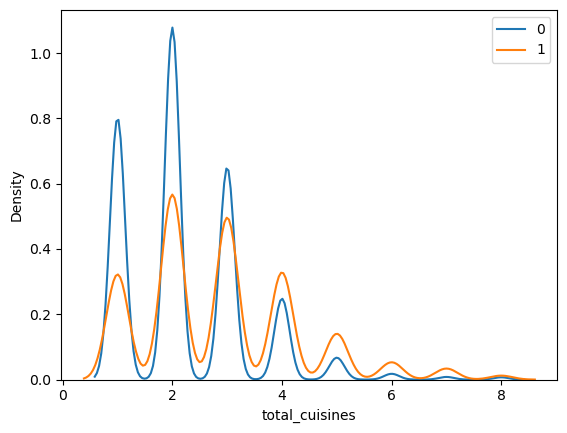

In [138]:
### if plots are overlapping feature is not distinctive so we need plots as seperated as possible
sns.distplot(dataframe[dataframe['target']==0]['total_cuisines'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['total_cuisines'],hist=False, label='1')
plt.legend()  ## overlapped

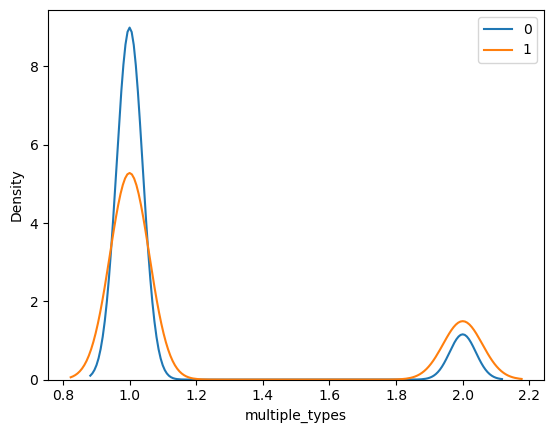

In [136]:
sns.distplot(dataframe[dataframe['target']==0]['multiple_types'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['multiple_types'], hist=False, label='1')
plt.legend() ## overlapped

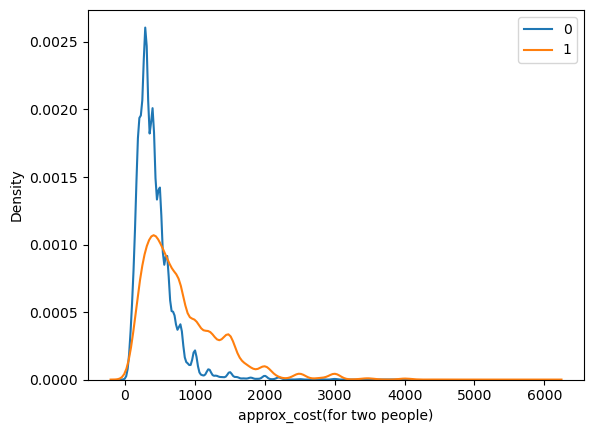

In [137]:
sns.distplot(dataframe[dataframe['target']==0]['approx_cost(for two people)'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['approx_cost(for two people)'], hist=False, label='1')
plt.legend() ## partial overlapped

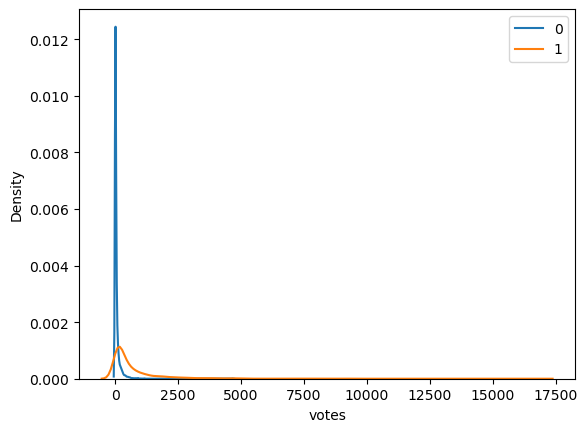

In [139]:
sns.distplot(dataframe[dataframe['target']==0]['votes'], hist=False, label='0')
sns.distplot(dataframe[dataframe['target']==1]['votes'], hist=False, label='1')
plt.legend() ## partial overlapped

In [140]:
### feature encoding starts below

In [141]:
## online order yes or no format so computer doesn't understand so we will make this attribute numerical to computer can understand

In [142]:
dataframe['online_order']

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51717, dtype: object

In [143]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

In [145]:
dataframe = dataframe.dropna()

In [146]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

In [147]:
imp_features = [ 'online_order', 'book_table', 
       'votes',  'location', 'rest_type', 
       'approx_cost(for two people)', 
       'listed_in(type)', 'listed_in(city)', 
      'target']

In [149]:
data = dataframe[imp_features]

In [150]:
data.shape

(42144, 9)

In [155]:
cat_features = [col for col in data.columns if data[col].dtype=='O']

In [156]:
num_features = [col for col in data.columns if data[col].dtype!='O']

In [157]:
data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [158]:
for feature in cat_features:
    print('{} has {} unique features'.format(feature, data[feature].nunique()))

online_order has 2 unique features
book_table has 2 unique features
location has 92 unique features
rest_type has 87 unique features
listed_in(type) has 7 unique features
listed_in(city) has 30 unique features


In [160]:
freq_cat = data['rest_type'].value_counts()[0:5]/len(data)*100

In [161]:
freq_cat

rest_type
Quick Bites       33.857726
Casual Dining     23.156321
Cafe               7.984529
Dessert Parlor     4.477506
Delivery           4.057517
Name: count, dtype: float64

In [162]:
data['rest_type'].isin(freq_cat.index)

0         True
1         True
2        False
3         True
4         True
         ...  
51709    False
51711    False
51712    False
51715    False
51716    False
Name: rest_type, Length: 42144, dtype: bool

In [163]:
data[data['rest_type'].isin(freq_cat.index)]

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,0
5,Yes,No,286,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,0
...,...,...,...,...,...,...,...,...,...
51632,No,No,4,KR Puram,Quick Bites,350.0,Dine-out,Whitefield,0
51634,No,No,34,Brookefield,Quick Bites,200.0,Dine-out,Whitefield,0
51635,No,No,7,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0
51640,No,No,31,KR Puram,Quick Bites,400.0,Dine-out,Whitefield,0


In [164]:
data['rest_type'].apply( lambda x : 'other' if x not in freq_cat.index else x )

0        Casual Dining
1        Casual Dining
2                other
3          Quick Bites
4        Casual Dining
             ...      
51709            other
51711            other
51712            other
51715            other
51716            other
Name: rest_type, Length: 42144, dtype: object

In [165]:
data['listed_in(city)'].value_counts()/len(data)*100

listed_in(city)
BTM                      6.304575
Koramangala 7th Block    5.682897
Koramangala 5th Block    5.464598
Koramangala 4th Block    5.455106
Koramangala 6th Block    5.108675
Jayanagar                4.683941
JP Nagar                 4.002942
Indiranagar              3.734814
Church Street            3.673121
MG Road                  3.644647
Brigade Road             3.571090
Lavelle Road             3.485668
HSR                      3.246014
Residency Road           3.219913
Marathahalli             3.113136
Bannerghatta Road        2.987377
Whitefield               2.920938
Old Airport Road         2.821279
Brookefield              2.783314
Basavanagudi             2.565015
Kammanahalli             2.484339
Sarjapur Road            2.446374
Kalyan Nagar             2.432137
Bellandur                2.337225
Frazer Town              2.318242
Malleshwaram             2.242312
Electronic City          2.080961
Rajajinagar              2.078588
Banashankari             1.74402

In [166]:
data['listed_in(type)'].value_counts()/len(data)*100

listed_in(type)
Delivery              49.867122
Dine-out              33.966875
Desserts               6.529992
Cafes                  3.590072
Drinks & nightlife     2.500949
Buffet                 2.033504
Pubs and bars          1.511484
Name: count, dtype: float64

In [168]:
data['location'].value_counts()/len(data)*100

location
BTM                      9.586181
Koramangala 5th Block    5.457479
HSR                      4.857156
Indiranagar              4.325645
JP Nagar                 4.235478
                           ...   
Yelahanka                0.009491
West Bangalore           0.009491
Rajarajeshwari Nagar     0.004746
Nagarbhavi               0.002373
Peenya                   0.002373
Name: count, Length: 92, dtype: float64

In [171]:
pd.get_dummies(data['online_order'], prefix= 'online_order', drop_first=True)

,online_order_Yes
0,True
1,True
2,True
3,False
4,False
...,...
51709,False
51711,False
51712,False
51715,False


In [212]:
for col in ['online_order', 'book_table', 'rest_type', 'listed_in(type)']:
    col_encoded = pd.get_dummies(data[col], prefix= col, drop_first= True)
    col_encoded = col_encoded.astype (int)
    data = pd.concat([data, col_encoded], axis= 1)

In [213]:
data.head(4)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Sweet Shop,"rest_type_Sweet Shop, Quick Bites",rest_type_Takeaway,"rest_type_Takeaway, Delivery",listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,0.298039,Casual Dining,800.0,Buffet,0.326531,1,True,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,787,0.298039,Casual Dining,800.0,Buffet,0.326531,1,True,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,918,0.298039,"Cafe, Casual Dining",800.0,Buffet,0.326531,0,True,...,0,0,0,0,0,0,0,0,0,0
3,No,No,88,0.298039,Quick Bites,300.0,Buffet,0.326531,0,False,...,0,0,0,0,0,0,0,0,0,0


In [190]:
data[['location','listed_in(city)']]

,location,listed_in(city)
0,Banashankari,Banashankari
1,Banashankari,Banashankari
2,Banashankari,Banashankari
3,Banashankari,Banashankari
4,Basavanagudi,Banashankari
...,...,...
51709,Whitefield,Whitefield
51711,Whitefield,Whitefield
51712,Whitefield,Whitefield
51715,"ITPL Main Road, Whitefield",Whitefield


In [191]:
data.groupby(['location'])['target'].mean()

location
BTM                  0.246040
Banashankari         0.298039
Banaswadi            0.090717
Bannerghatta Road    0.233756
Basavanagudi         0.365000
                       ...   
West Bangalore       0.250000
Whitefield           0.336855
Wilson Garden        0.151042
Yelahanka            0.500000
Yeshwantpur          0.142857
Name: target, Length: 92, dtype: float64

In [192]:
dict_mean_location = data.groupby(['location'])['target'].mean().to_dict() 

In [193]:
data['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51709                    Whitefield
51711                    Whitefield
51712                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 42144, dtype: object

In [195]:
data['location'] = data['location'].map(dict_mean_location)

In [196]:
data['location']

0        0.298039
1        0.298039
2        0.298039
3        0.298039
4        0.365000
           ...   
51709    0.336855
51711    0.336855
51712    0.336855
51715    0.219780
51716    0.219780
Name: location, Length: 42144, dtype: float64

In [197]:
data.groupby(['listed_in(city)'])['target'].mean().to_dict()

{'BTM': 0.4019570944674445,
 'Banashankari': 0.32653061224489793,
 'Bannerghatta Road': 0.2891183478951549,
 'Basavanagudi': 0.3866790009250694,
 'Bellandur': 0.3187817258883249,
 'Brigade Road': 0.5222591362126245,
 'Brookefield': 0.2847399829497016,
 'Church Street': 0.5167958656330749,
 'Electronic City': 0.18814139110604333,
 'Frazer Town': 0.4155578300921187,
 'HSR': 0.36403508771929827,
 'Indiranagar': 0.49110546378653114,
 'JP Nagar': 0.3390634262003557,
 'Jayanagar': 0.39159067882472137,
 'Kalyan Nagar': 0.33658536585365856,
 'Kammanahalli': 0.3247373447946514,
 'Koramangala 4th Block': 0.4432361896476729,
 'Koramangala 5th Block': 0.43595310464611375,
 'Koramangala 6th Block': 0.4389224338132838,
 'Koramangala 7th Block': 0.4334029227557411,
 'Lavelle Road': 0.48876786929884275,
 'MG Road': 0.5299479166666666,
 'Malleshwaram': 0.4158730158730159,
 'Marathahalli': 0.24542682926829268,
 'New BEL Road': 0.3489583333333333,
 'Old Airport Road': 0.46173254835996635,
 'Rajajinagar':

In [198]:
dict_mean_city = data.groupby(['listed_in(city)'])['target'].mean().to_dict()

In [199]:
data['listed_in(city)'] = data['listed_in(city)'].map(dict_mean_city)

In [200]:
data['listed_in(city)']

0        0.326531
1        0.326531
2        0.326531
3        0.326531
4        0.326531
           ...   
51709    0.337124
51711    0.337124
51712    0.337124
51715    0.337124
51716    0.337124
Name: listed_in(city), Length: 42144, dtype: float64

In [201]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [208]:
data.head(3)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Sweet Shop,"rest_type_Sweet Shop, Quick Bites",rest_type_Takeaway,"rest_type_Takeaway, Delivery",listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,0.298039,Casual Dining,800.0,Buffet,0.326531,1,True,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,787,0.298039,Casual Dining,800.0,Buffet,0.326531,1,True,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,918,0.298039,"Cafe, Casual Dining",800.0,Buffet,0.326531,0,True,...,0,0,0,0,0,0,0,0,0,0


In [215]:
data.drop(['online_order','book_table','rest_type','listed_in(type)'], axis=1, inplace=True)

In [216]:
data.head(2)


,votes,location,approx_cost(for two people),listed_in(city),target,online_order_Yes,book_table_Yes,"rest_type_Bakery, Beverage Shop","rest_type_Bakery, Cafe","rest_type_Bakery, Dessert Parlor",...,rest_type_Sweet Shop,"rest_type_Sweet Shop, Quick Bites",rest_type_Takeaway,"rest_type_Takeaway, Delivery",listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,775,0.298039,800.0,0.326531,1,True,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,787,0.298039,800.0,0.326531,1,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [217]:
data['votes'].min()

0

In [218]:
data['votes'].max()

16832

In [221]:
from scipy import stats

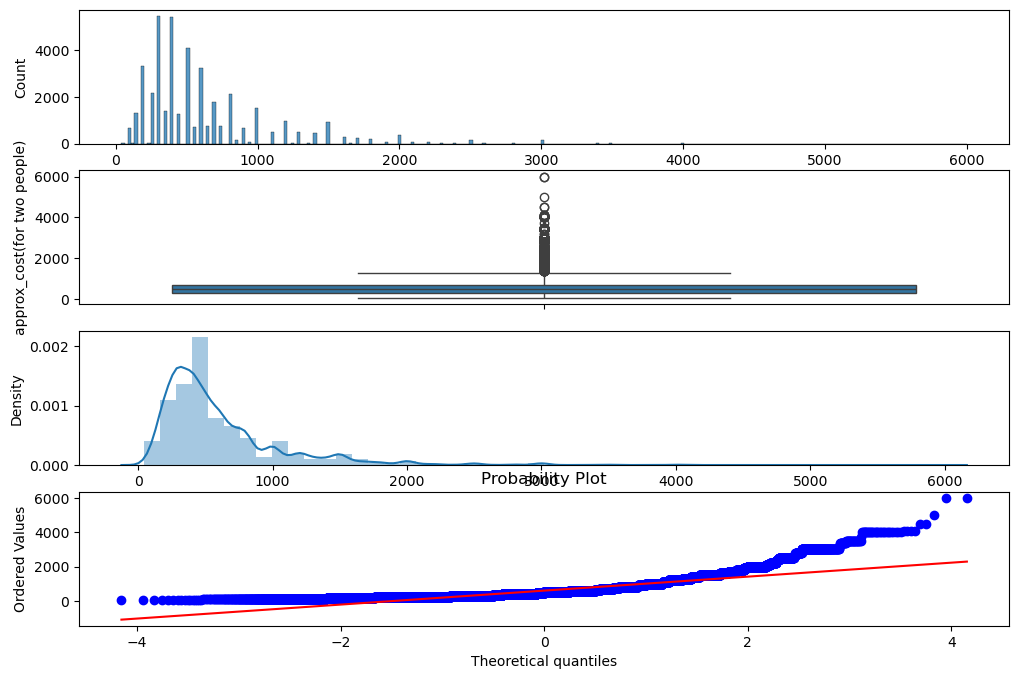

In [228]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
sns.boxplot(data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])

plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'], plot=plt)

plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

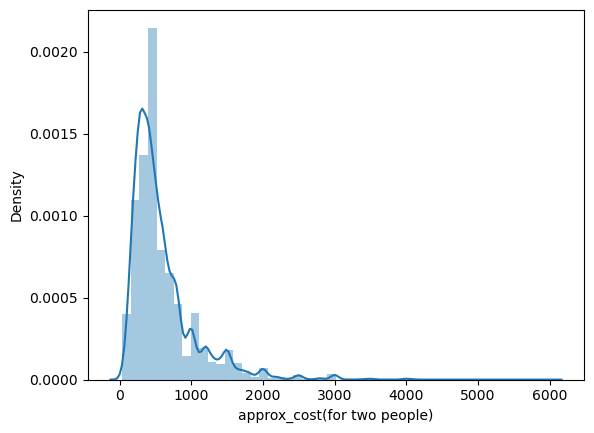

In [229]:
sns.distplot(data['approx_cost(for two people)'])

In [232]:
np.log1p(data['approx_cost(for two people)'])

0        6.685861
1        6.685861
2        6.685861
3        5.707110
4        6.398595
           ...   
51709    6.685861
51711    6.685861
51712    7.313887
51715    7.824446
51716    7.313887
Name: approx_cost(for two people), Length: 42144, dtype: float64

<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

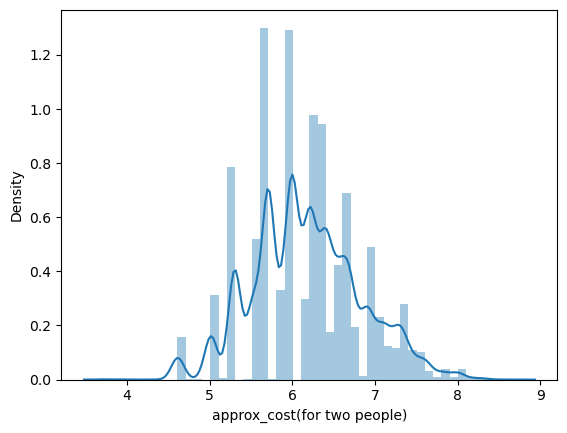

In [233]:
sns.distplot(np.log1p(data['approx_cost(for two people)']))

In [234]:
data['approx_cost(for two people)'] = np.log1p(data['approx_cost(for two people)'])

In [235]:
data['approx_cost(for two people)']

0        6.685861
1        6.685861
2        6.685861
3        5.707110
4        6.398595
           ...   
51709    6.685861
51711    6.685861
51712    7.313887
51715    7.824446
51716    7.313887
Name: approx_cost(for two people), Length: 42144, dtype: float64

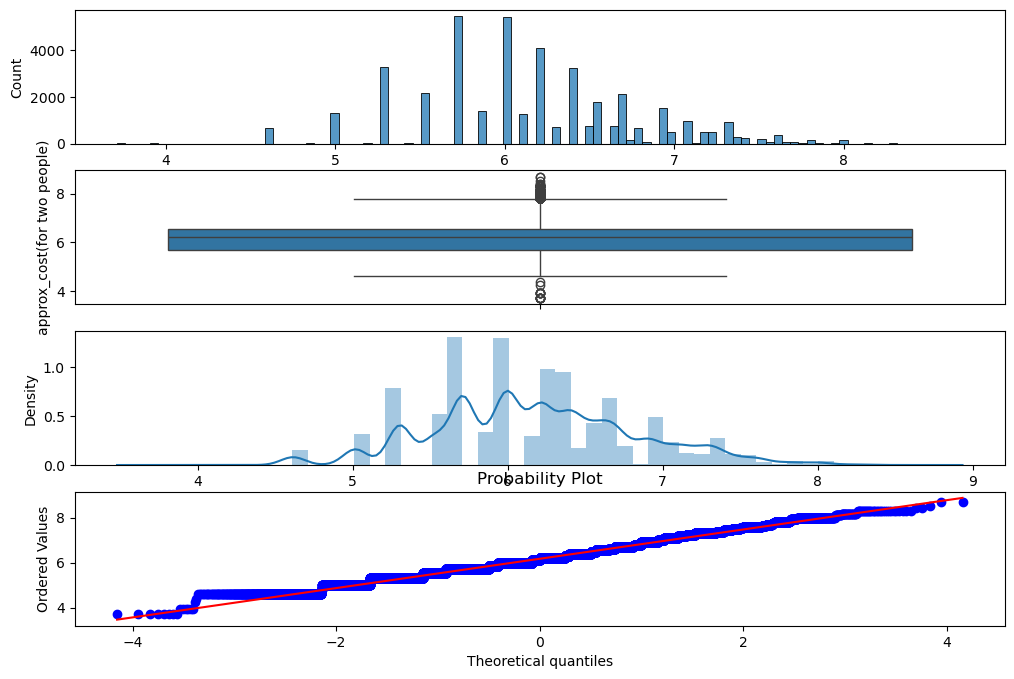

In [236]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
sns.boxplot(data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])

plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'], plot=plt)

plt.show()

In [237]:
data.columns

Index(['votes', 'location', 'approx_cost(for two people)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Bakery, Beverage Shop', 'rest_type_Bakery, Cafe',
       'rest_type_Bakery, Dessert Parlor',
       ...
       'rest_type_Sweet Shop', 'rest_type_Sweet Shop, Quick Bites',
       'rest_type_Takeaway', 'rest_type_Takeaway, Delivery',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object', length=1039)

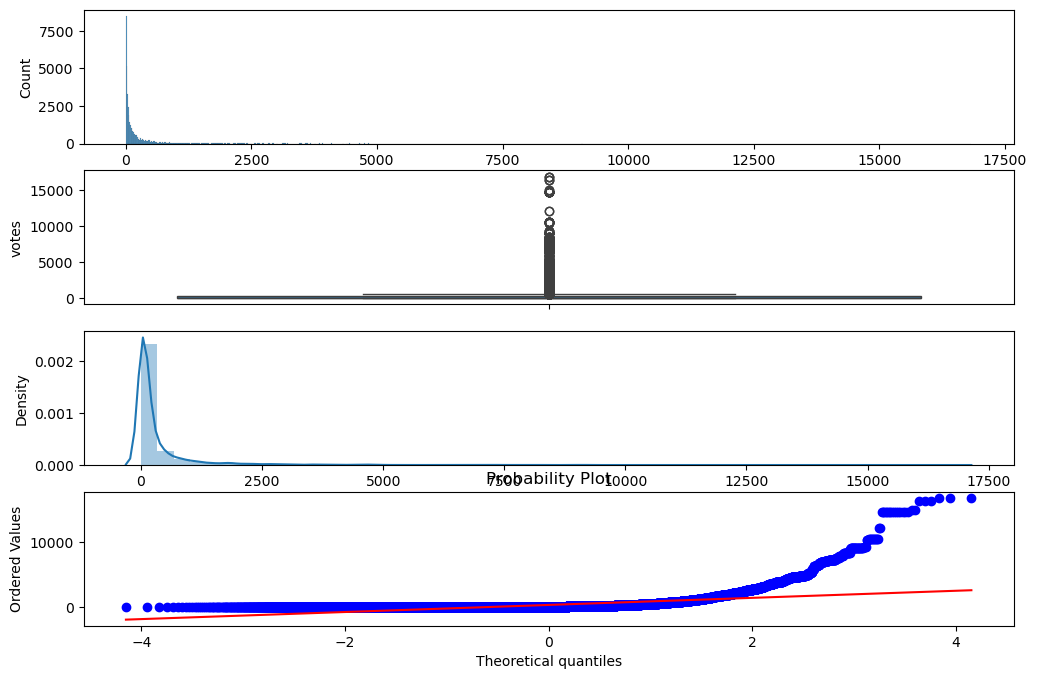

In [238]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
sns.boxplot(data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])

plt.subplot(414)
stats.probplot(data['votes'], plot=plt)

plt.show()

In [239]:
data['votes']= np.log1p(data['votes'])

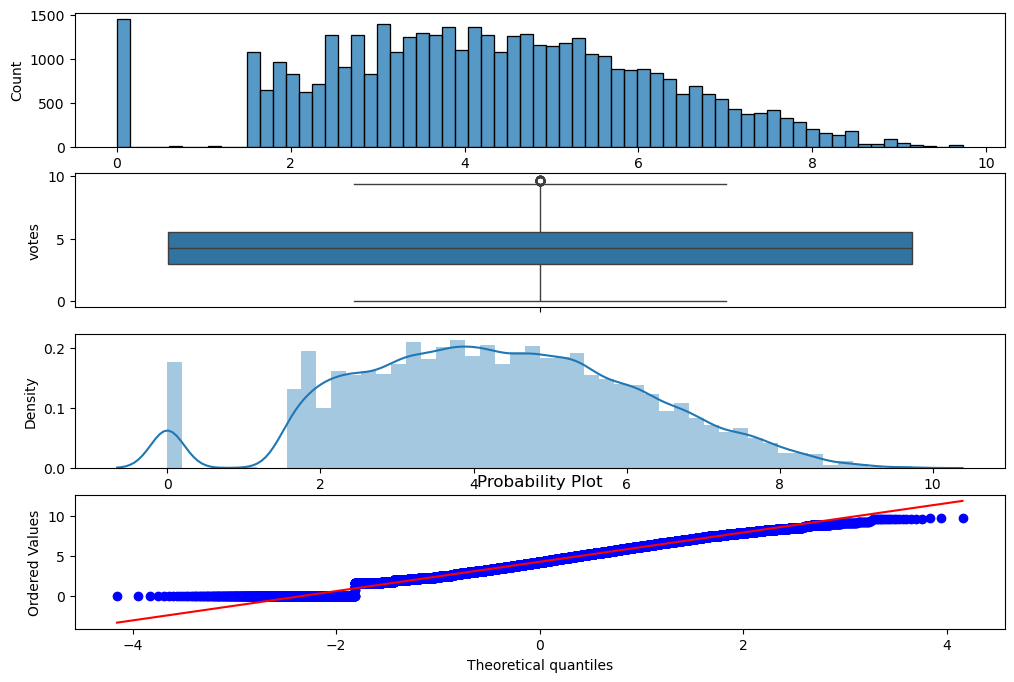

In [240]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
sns.boxplot(data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])

plt.subplot(414)
stats.probplot(data['votes'], plot=plt)

plt.show()

In [242]:
### Model Building

In [243]:
data.dtypes

votes                                 float64
location                              float64
approx_cost(for two people)           float64
listed_in(city)                       float64
target                                  int64
                                       ...   
listed_in(type)_Delivery                int32
listed_in(type)_Desserts                int32
listed_in(type)_Dine-out                int32
listed_in(type)_Drinks & nightlife      int32
listed_in(type)_Pubs and bars           int32
Length: 1039, dtype: object

In [245]:
X = data.drop('target', axis=1)

In [247]:
y= data['target']

In [248]:
from sklearn.model_selection import train_test_split

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [253]:
X_train.shape

(31608, 1038)

In [254]:
data.shape

(42144, 1039)

In [255]:
from sklearn.ensemble import RandomForestClassifier

In [256]:
rf_model = RandomForestClassifier() 

In [257]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [259]:
predictions= rf_model.predict(X_test)

In [260]:
predictions

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [261]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [262]:
accuracy_score(predictions, y_test)

0.9083143507972665

In [263]:
confusion_matrix(predictions, y_test )

array([[5966,  594],
       [ 372, 3604]], dtype=int64)

In [264]:
### model optimization

In [265]:
RandomForestClassifier()

RandomForestClassifier()

In [272]:
n_estimators = [int(x) for x in np.linspace(100,1200, num=3)]

max_features = ["auto","sqrt"]

max_depth = [int(x) for x in np.linspace(5,30, num = 3) ]
min_samples_split= [5, 10, 100]


In [273]:
random_grid = {
    'n_estimators' : n_estimators ,
    'max_features' : max_features ,
    'max_depth' : max_depth ,
    'min_samples_split' : min_samples_split 
}
    

In [274]:
from sklearn.model_selection import RandomizedSearchCV

In [276]:
estimator= RandomForestClassifier()

In [280]:
rf_random =RandomizedSearchCV( estimator = estimator, param_distributions= random_grid, cv=2, verbose=2 , n_jobs=1 )

In [281]:
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=17, max_features=sqrt, min_samples_split=5, n_estimators=1200; total time= 3.2min
[CV] END max_depth=17, max_features=sqrt, min_samples_split=5, n_estimators=1200; total time= 3.0min
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=650; total time=  12.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=650; total time=  12.8s
[CV] END max_depth=30, max_features=auto, min_samples_split=5, n_estimators=650; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_split=5, n_estimators=650; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=100, n_estimators=1200; total time=  23.7s
[CV] END max_depth=5, max_feature

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 17, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 100],
                                        'n_estimators': [100, 650, 1200]},
                   verbose=2)

In [282]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 17}

In [283]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=17, min_samples_split=5, n_estimators=1200)

In [285]:
rf_opt= RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5, n_estimators=650)

In [286]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=650)

In [288]:
predictions_opt= rf_opt.predict(X_test)

In [289]:
accuracy_score(predictions_opt, y_test)

0.896545178435839